<a href="https://colab.research.google.com/github/wooohoooo/NeuralThompsonTrainer/blob/master/invertible_Thompson_Sampling_simple_moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install git+https://github.com/VLL-HD/FrEIA.git
!pip install torch

  Cloning https://github.com/VLL-HD/FrEIA.git to /tmp/pip-req-build-e1w6krmf
  Running command git clone -q https://github.com/VLL-HD/FrEIA.git /tmp/pip-req-build-e1w6krmf
  Created wheel for FrEIA: filename=FrEIA-0.2-cp37-none-any.whl size=48868 sha256=40c79070928abb356d381bf23a70cca462d9ea60fd54ee8e929d985100b01771
  Stored in directory: /tmp/pip-ephem-wheel-cache-ufo66j55/wheels/ef/43/b5/3c9aca4efde5d9ab4d0587e900ede2e68c24d07df76217d43e
Successfully built FrEIA


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch


In [27]:
contexts = np.arange(0,1,0.01)
np.random.shuffle(contexts)
arms = np.arange(0,1,0.01)#np.array([0,1])
np.random.shuffle(arms)

def get_reward(a,c):
  if 0.45 <= a + c <= 0.95:
    return 1
  return 0


rewards = []
r1 = []

for a,c in zip(arms,contexts):
  #for a in arms:
    rewards += [get_reward(a, c)]
  #r1 += [get_reward(1, c)]

In [28]:
# r0, r1, contexts
len(rewards), len(arms), len(contexts)

# https://stackoverflow.com/questions/43044454/different-color-points-from-an-array-in-matplotlib-animation

(100, 100, 100)

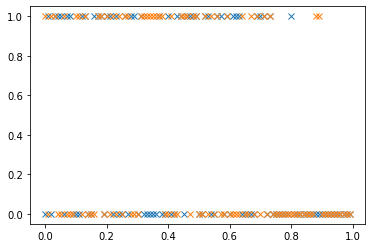

In [29]:
plt.plot(contexts, rewards,'x')
plt.plot(arms, rewards,'x')

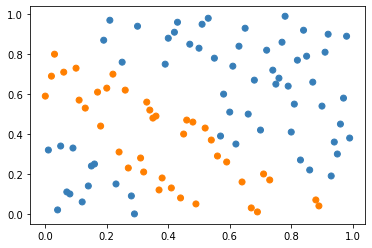

In [30]:
from itertools import cycle, islice



colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(1 + 1))))



colors2 = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00'][::-1]),
                                      int(1 + 1))))

plt.scatter(arms, contexts,color = colors[rewards])

In [31]:
#colors[rewards]

colors[rewards[1]]

'#ff7f00'

In [32]:
# class TS(object):
#   def __init__(self):
#     self.model = 

In [33]:


# for context in contexts:
#   arm = get_arm(context)
#   reward = get_reward(arm,ccontext)
#   update_model(arm, context, reward)


In [34]:
def plot_outcome(positive=True):

  z = torch.rand(BATCHSIZE, N_DIM) *2-1
  z[:,1] = torch.ones(BATCHSIZE, 1).T * positive
  #z[0]
  samples, _ = inn(z, rev=True)
  samples_ = samples.detach().numpy()

  #sample_rewards = [get_reward(zett[0],s[1]) for s,zett in zip(samples_,z)]
  sample_rewards = [get_reward(s[0],s[1]) for s in samples_]


  #plt.scatter(z[:,0],samples_[:,1], color = colors[sample_rewards])
  plt.scatter(samples_[:,0],samples_[:,1], color = colors[sample_rewards])

  plt.scatter(arms, contexts,color = colors2[rewards])
  plt.show()


In [37]:
# standard imports
import torch
import torch.nn as nn
from sklearn.datasets import make_moons

# FrEIA imports
import FrEIA.framework as Ff
import FrEIA.modules as Fm

BATCHSIZE = 100
N_DIM = 2

# we define a subnet for use inside an affine coupling block
# for more detailed information see the full tutorial
def subnet_fc(dims_in, dims_out):
    return nn.Sequential(nn.Linear(dims_in, 256), nn.ReLU(),
                         nn.Linear(256,  dims_out))

# a simple chain of operations is collected by ReversibleSequential
inn = Ff.SequenceINN(N_DIM)
for k in range(8):
    inn.append(Fm.AllInOneBlock, subnet_constructor=subnet_fc, permute_soft=True)

optimizer = torch.optim.Adam(inn.parameters(), lr=0.005)
losses = []

plotting


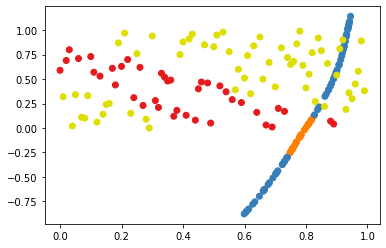

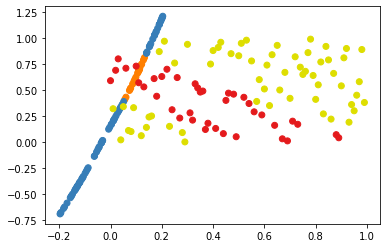

plotting


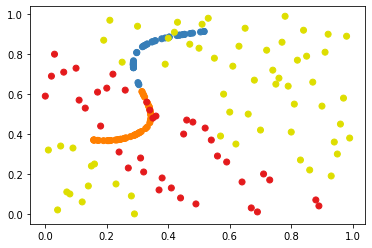

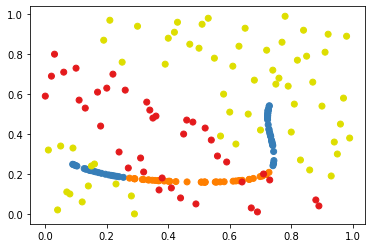

plotting


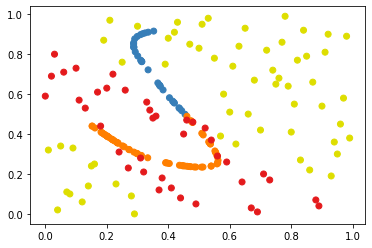

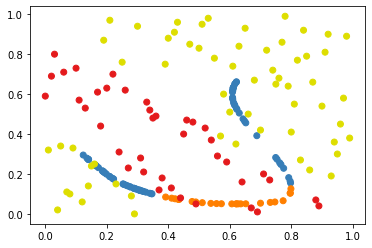

plotting


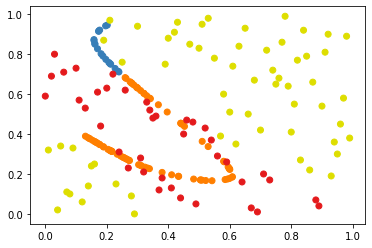

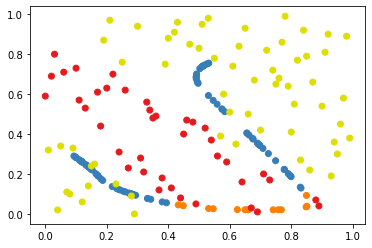

plotting


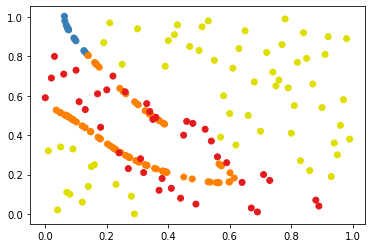

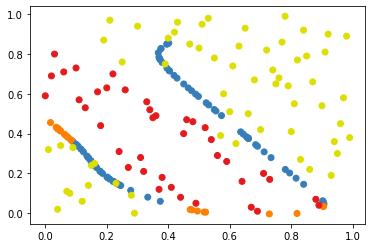

plotting


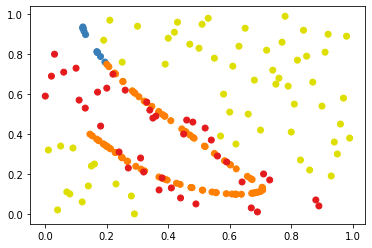

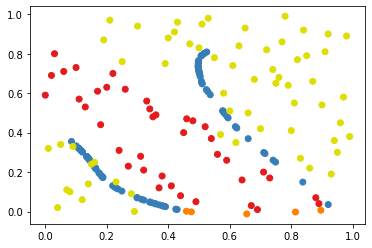

plotting


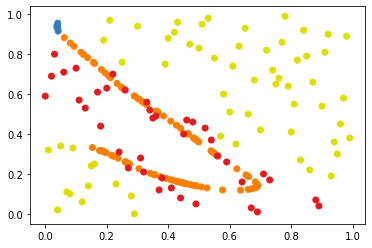

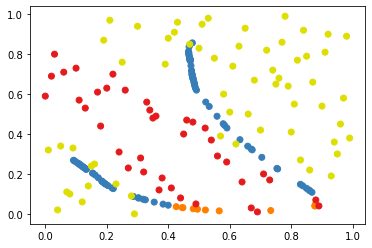

plotting


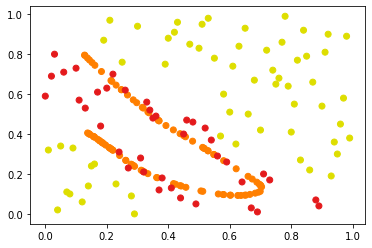

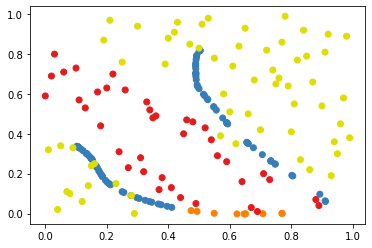

plotting


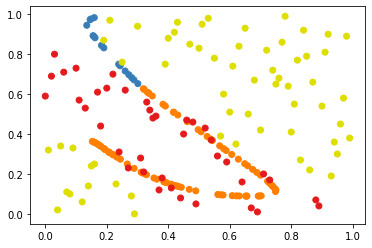

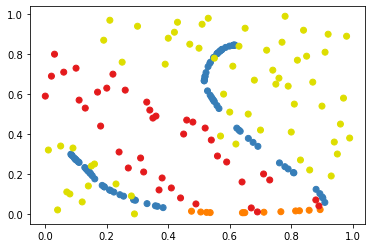

plotting


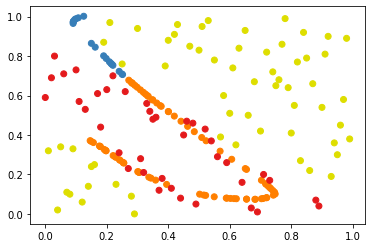

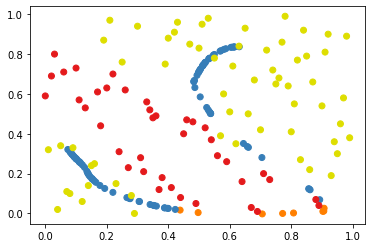

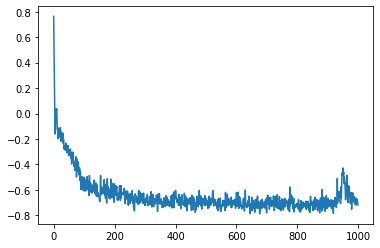

In [38]:
num_epochs = 1000
BATCHSIZE = 100
# a very basic training loop
for i in range(num_epochs):
    optimizer.zero_grad()
    # sample data from the moons distribution

    data = []
    label = []
    for j in range(BATCHSIZE):
      arm = np.random.choice(arms)
      context = np.random.choice(contexts)
      #print(arm)
      #print(context)

      reward = get_reward(arm,context)
      #if reward == 1:
      data.append([context,arm])
      label.append([context,reward])

    data = np.array(data)
    #label = np.array(label)
    #data, label = make_moons(n_samples=BATCHSIZE, noise=0.05)
    x = torch.Tensor(data)
    y = torch.Tensor(label)
    # pass to INN and get transformed variable z and log Jacobian determinant
    #z, log_jac_det = inn(x)
    a, log_jac_det = inn(x)
    pred_context = a[:,0]
    pred_reward = a[:,1]
    # calculate the negative log-likelihood of the model with a standard normal prior
    #loss = 0.5*torch.sum(z**2, 1) - 
    target_loss = (pred_reward - y[:,1])**2
    context_loss = (pred_context - x[:,0])**2
    loss = target_loss + context_loss - log_jac_det
    loss = loss.mean() / N_DIM
    # backpropagate and update the weights
    loss.backward()
    optimizer.step()

    losses += [loss.detach().numpy()]

    if i % (num_epochs/10) == 0:
      print('plotting')
      plt.figure()
      plot_outcome()
      plot_outcome(False)

plt.figure()
plt.plot(losses)

In [39]:
#x[:,1], pred_context, x[:,0], arms

In [263]:
#len(x[:,1]),pred_context, pred_reward

In [271]:
# sample from the INN by sampling from a standard normal and transforming
# it in the reverse direction


tensor([-0.0314,  1.0000])

In [272]:
#z

In [273]:
torch.mean((y[:,1] - pred_reward)**2)

tensor(0.3956, grad_fn=<MeanBackward0>)

In [274]:
#z[:,1] =  torch.ones(BATCHSIZE, 1).T

In [43]:
def plot_outcome(positive=True):

  z = torch.rand(BATCHSIZE, N_DIM) *2-1
  z[:,1] = torch.ones(BATCHSIZE, 1).T * positive
  z[0]
  samples, _ = inn(z, rev=True)
  samples_ = samples.detach().numpy()
  sample_rewards = [get_reward(s[0],s[1]) for s in samples_]


  #plt.scatter(z[:,0],samples_[:,1], color = colors[sample_rewards])
  plt.scatter(samples_[:,0],samples_[:,1], color = colors[sample_rewards])

  plt.scatter(arms, contexts,color = colors[rewards])
  plt.show()

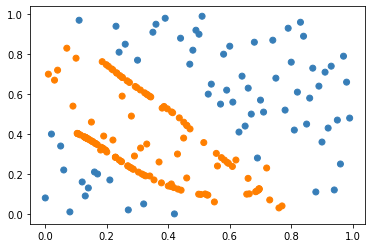

In [44]:
plot_outcome()

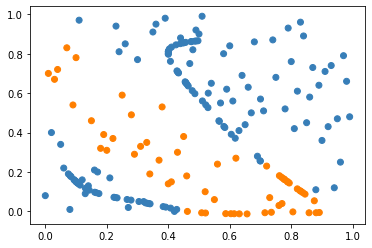

In [45]:
plot_outcome(False)

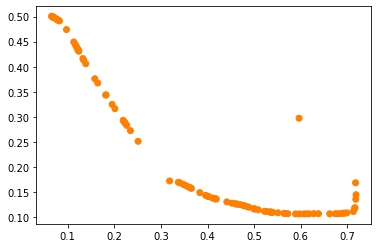

In [278]:
plt.scatter(samples_[:,0],samples_[:,1], color = colors[sample_rewards])

In [244]:
z[:,0]

tensor([ 0.1489, -0.1395, -0.8917,  0.1304,  0.8491, -0.6915, -0.1525, -0.8179,
        -0.9971,  0.1403, -0.4058,  0.7805, -0.8640,  0.9534, -0.5395,  0.7809,
        -0.9564, -0.0860, -0.6622,  0.4578, -0.2642, -0.9445,  0.0825,  0.2256,
         0.8732,  0.7953,  0.0924,  0.2570, -0.7543,  0.1338,  0.6740, -0.5596,
         0.6160, -0.6448,  0.7243, -0.2334,  0.2157, -0.2665, -0.2541,  0.0502,
        -0.2816, -0.4569, -0.7404, -0.8544, -0.7716, -0.7391,  0.7070,  0.4961,
         0.3105, -0.8267,  0.8436, -0.2392, -0.8327,  0.2037,  0.8294,  0.1781,
        -0.1884, -0.4427,  0.0581, -0.2301,  0.9968,  0.1910, -0.5683, -0.3060,
        -0.3861, -0.0259,  0.0034,  0.0733, -0.9841,  0.9514, -0.9478,  0.2065,
         0.1178,  0.2533, -0.3671, -0.0242,  0.2958,  0.0374, -0.5656,  0.6724,
         0.7985,  0.8299, -0.3573, -0.5308, -0.6852,  0.0962, -0.5990,  0.0327,
         0.4275,  0.7896, -0.9996,  0.7326,  0.5759, -0.8442, -0.3027,  0.8534,
         0.4730,  0.8272,  0.1959, -0.52

In [245]:
# standard imports
import torch
import torch.nn as nn
from sklearn.datasets import make_moons

# FrEIA imports
import FrEIA.framework as Ff
import FrEIA.modules as Fm

BATCHSIZE = 100
N_DIM = 2

# we define a subnet for use inside an affine coupling block
# for more detailed information see the full tutorial
def subnet_fc(dims_in, dims_out):
    return nn.Sequential(nn.Linear(dims_in, 512), nn.ReLU(),
                         nn.Linear(512,  dims_out))

# a simple chain of operations is collected by ReversibleSequential
inn = Ff.SequenceINN(N_DIM)
for k in range(8):
    inn.append(Fm.AllInOneBlock, subnet_constructor=subnet_fc, permute_soft=True)

optimizer = torch.optim.Adam(inn.parameters(), lr=0.005)


# sample from the INN by sampling from a standard normal and transforming
# it in the reverse direction
z = torch.randn(BATCHSIZE, N_DIM)
samples, _ = inn(z, rev=True)

In [134]:
inn(x)

(tensor([[ 0.0774,  1.0412],
         [-0.8839,  0.6625],
         [-0.3776,  1.1830],
         [-0.3156,  1.0109],
         [-0.0616,  1.1432],
         [-0.9967,  0.7326],
         [-0.0355,  0.9522],
         [-0.4165,  0.5599],
         [ 0.1235,  1.3956],
         [-0.6057,  0.4242],
         [ 0.0959,  1.2113],
         [-0.1583,  1.1448],
         [-0.5245,  1.5365],
         [-0.8295,  1.5917],
         [ 0.2091,  1.1048],
         [-0.1738,  1.0492],
         [-0.0974,  1.1455],
         [-0.9055,  0.7111],
         [ 0.0834,  1.2484],
         [-0.7517,  0.7684],
         [-0.8610,  1.1502],
         [-0.2679,  0.4245],
         [-0.4288,  0.9003],
         [-0.0400,  0.6102],
         [-0.3999,  1.2366],
         [ 0.0981,  1.1798],
         [ 0.1400,  1.0820],
         [-0.5339,  0.6649],
         [-0.9196,  1.1716],
         [-0.3928,  0.3994],
         [-0.5649,  0.4067],
         [-0.7700,  0.7893],
         [-0.2808,  0.5829],
         [-0.2416,  0.4954],
         [-0.4

In [21]:
#plt.plot(samples.detach().numpy())

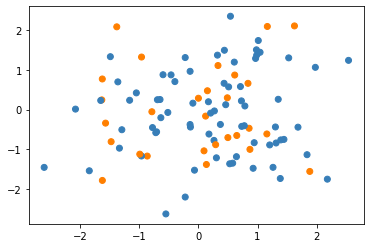

In [22]:
samples_ = samples.detach().numpy()
plt.scatter(samples_[:,0],samples_[:,1],color=colors[label])

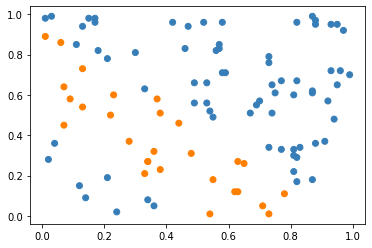

In [23]:
plt.scatter(data[:,0], data[:,1],color=colors[label])

In [24]:
# a very basic training loop
for i in range(1000):
    optimizer.zero_grad()
    # sample data from the moons distribution

    

    data, label = make_moons(n_samples=BATCHSIZE, noise=0.05)
    x = torch.Tensor(data)
    # pass to INN and get transformed variable z and log Jacobian determinant
    z, log_jac_det = inn(x)
    # calculate the negative log-likelihood of the model with a standard normal prior
    loss = 0.5*torch.sum(z**2, 1) - log_jac_det
    loss = loss.mean() / N_DIM
    # backpropagate and update the weights
    loss.backward()
    optimizer.step()
    

  # sample from the INN by sampling from a standard normal and transforming
# it in the reverse direction
z = torch.randn(BATCHSIZE, N_DIM)
samples, _ = inn(z, rev=True)

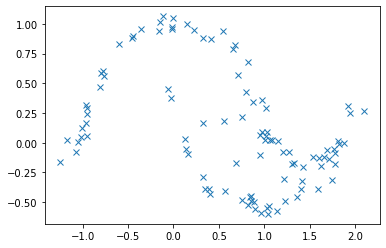

In [25]:
samples_ = samples.detach().numpy()
plt.plot(samples_[:,0],samples_[:,1],'x')

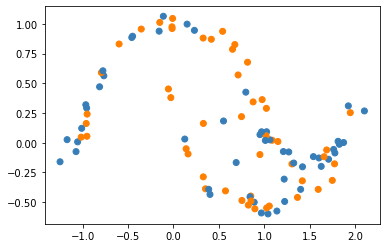

In [26]:
plt.scatter(samples_[:,0],samples_[:,1],color=colors[label])

In [27]:

def  moon_reward(a,c):
  n_samples_out = 100
  n_samples_in = 100

  outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples_out))
  outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples_out))
  inner_circ_x = 1 - np.cos(np.linspace(0, np.pi, n_samples_in))
  inner_circ_y = 1 - np.sin(np.linspace(0, np.pi, n_samples_in)) - .5

  X = np.vstack([np.append(outer_circ_x, inner_circ_x),
                   np.append(outer_circ_y, inner_circ_y)]).T
  y = np.hstack([np.zeros(n_samples_out, dtype=np.intp),
                   np.ones(n_samples_in, dtype=np.intp)])
  
  if a in x and c in y:
    return 1
  else:
    return 0


def circle_reward(a,c):

  n_samples_out = 100
  n_samples_in = 100

  factor = 1

  linspace_out = np.linspace(0, 2 * np.pi, n_samples_out, endpoint=False)
  linspace_in = np.linspace(0, 2 * np.pi, n_samples_in, endpoint=False)
  outer_circ_x = np.cos(linspace_out)
  outer_circ_y = np.sin(linspace_out)
  inner_circ_x = np.cos(linspace_in) * factor
  inner_circ_y = np.sin(linspace_in) * factor

  X = np.vstack([np.append(outer_circ_x, inner_circ_x),
                  np.append(outer_circ_y, inner_circ_y)]).T
  y = np.hstack([np.zeros(n_samples_out, dtype=np.intp),
                  np.ones(n_samples_in, dtype=np.intp)])
  
  return x, y

In [28]:
moon_reward(0,0)

0

In [29]:
x,y = circle_reward(0,1)

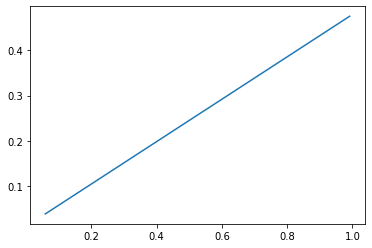

In [30]:
plt.plot(x[0],x[1])